<a href="https://colab.research.google.com/github/MichelaMarini/MATH-6373-PyTorch-tutorial/blob/main/TorchVision_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torchvision
from torchvision.datasets import VOCDetection
from torchvision.transforms import ToTensor
from PIL import Image, ImageDraw
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt

# Define transforms to apply to the images and labels
transform = ToTensor()

# Load PASCAL VOC dataset
train_dataset = torchvision.datasets.VOCDetection(root='./data', year='2008', image_set='train', download=True, transform=transform)


100%|██████████| 577034240/577034240 [00:36<00:00, 15721645.10it/s]


Extracting ./data/VOCtrainval_11-May-2012.tar to ./data


target {'annotation': {'folder': 'VOC2008', 'filename': '2008_000502.jpg', 'source': {'database': 'The VOC2008 Database', 'annotation': 'PASCAL VOC2008', 'image': 'flickr', 'flickrid': 'n/a'}, 'owner': {'flickrid': 'n/a', 'name': 'n/a'}, 'size': {'width': '405', 'height': '500', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'cat', 'pose': 'SideFaceLeft', 'truncated': '0', 'occluded': '0', 'bndbox': {'xmin': '99.8054', 'ymin': '18.8623', 'xmax': '396.2126', 'ymax': '390.1198'}, 'difficult': '0'}, {'name': 'cat', 'pose': 'SideFaceLeft', 'truncated': '0', 'occluded': '0', 'bndbox': {'xmin': '38.7275', 'ymin': '182.9341', 'xmax': '239.9251', 'ymax': '482.3353'}, 'difficult': '0'}]}}


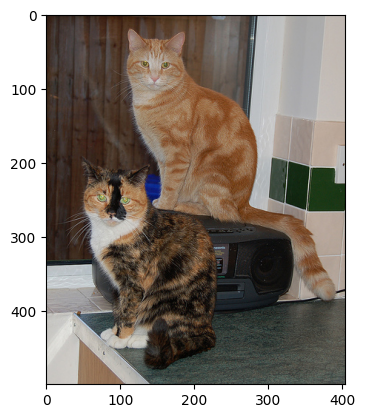

In [ ]:
# Choose an example index
example_idx = 125

# Get the example image and its corresponding labels
image, target = train_dataset[example_idx]

print("target", target)

image_pil = TF.to_pil_image(image)
# Plot the image
plt.imshow(image_pil)

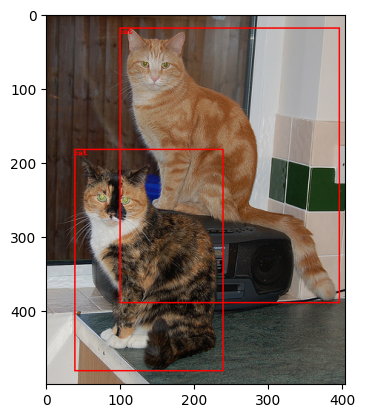

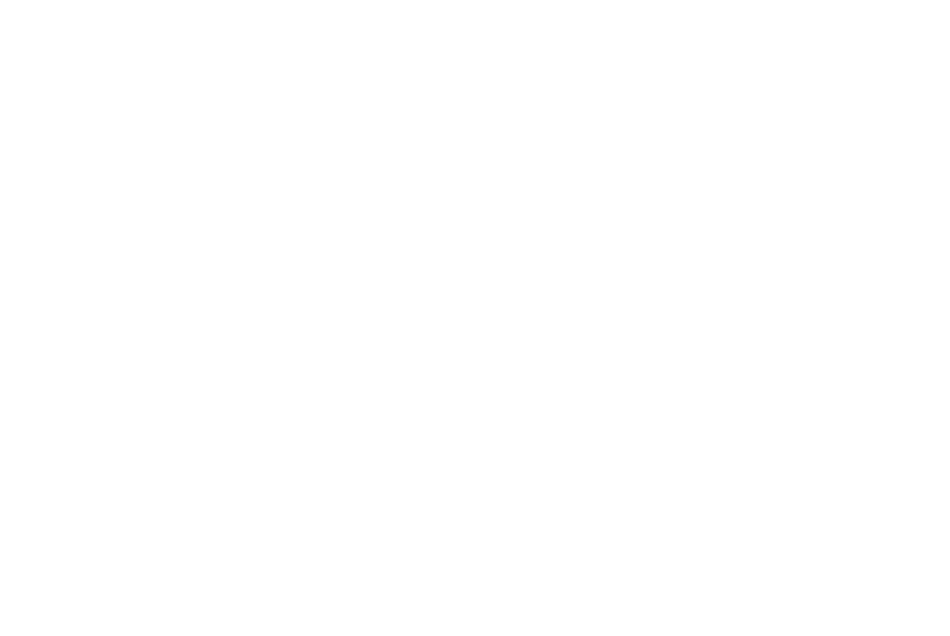

In [ ]:
# Create a draw object
draw = ImageDraw.Draw(image_pil)
plt.imshow(image_pil)

# Get image size
image_width, image_height = image_pil.size

# Visualize the example image with bounding boxes and labels
plt.figure(figsize=(12, 8))

for obj in target['annotation']['object']:
    # Extract bounding box coordinates
    xmin = int(float(obj['bndbox']['xmin']))
    ymin = int(float(obj['bndbox']['ymin']))
    xmax = int(float(obj['bndbox']['xmax']))
    ymax = int(float(obj['bndbox']['ymax']))

    # Ensure coordinates are within image bounds
    xmin = max(0, xmin)
    ymin = max(0, ymin)
    xmax = min(image_width, xmax)
    ymax = min(image_height, ymax)

    # Draw bounding box
    draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=2)

    # Get object label
    label = obj['name']

    # Draw label
    draw.text((xmin, ymin), label, fill="red")

plt.axis('off')
plt.show()

In [ ]:
!git clone https://github.com/amikelive/coco-labels.git

%cd coco-labels

%load coco-labels-paper.txt

# Load the contents of the coco-labels-paper.txt file
with open('coco-labels-paper.txt', 'r') as f:
    labels_text = f.read()

# Split the text into lines and create a dictionary
labels_dict = {str(i+1): label.strip() for i, label in enumerate(labels_text.split('\n'))}

# Print the dictionary
print(labels_dict)

Cloning into 'coco-labels'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 36 (delta 2), reused 9 (delta 2), pack-reused 25
Receiving objects: 100% (36/36), 7.93 KiB | 2.64 MiB/s, done.
Resolving deltas: 100% (7/7), done.
/content/coco-labels
{'1': 'person', '2': 'bicycle', '3': 'car', '4': 'motorcycle', '5': 'airplane', '6': 'bus', '7': 'train', '8': 'truck', '9': 'boat', '10': 'traffic light', '11': 'fire hydrant', '12': 'street sign', '13': 'stop sign', '14': 'parking meter', '15': 'bench', '16': 'bird', '17': 'cat', '18': 'dog', '19': 'horse', '20': 'sheep', '21': 'cow', '22': 'elephant', '23': 'bear', '24': 'zebra', '25': 'giraffe', '26': 'hat', '27': 'backpack', '28': 'umbrella', '29': 'shoe', '30': 'eye glasses', '31': 'handbag', '32': 'tie', '33': 'suitcase', '34': 'frisbee', '35': 'skis', '36': 'snowboard', '37': 'sports ball', '38': 'kite', '39': 'baseball bat', '40': 'basebal

https://pytorch.org/vision/stable/models.html

100%|██████████| 577034240/577034240 [00:52<00:00, 10934202.15it/s]


Extracting ./data/VOCtrainval_11-May-2012.tar to ./data


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 98.2MB/s]


[17, 17, 17, 17, 15, 67, 62, 81]
['cat', 'cat', 'cat', 'cat', 'bench', 'dining table', 'chair', 'sink']
labels [17, 17, 17, 17, 15, 67, 62, 81]
boxes tensor([[ 40.9686, 189.1302, 234.3813, 477.2586],
        [100.1006,  18.7927, 385.5231, 399.9154],
        [ 54.1413, 162.4732, 359.2859, 428.4047],
        [ 94.6932,  21.3306, 290.2758, 285.0211],
        [ 12.2554, 374.8988, 388.4559, 498.9025],
        [  6.6682, 344.8187, 405.0000, 500.0000],
        [  3.2782, 289.5862, 365.1046, 499.0038],
        [  0.0000, 317.8444, 390.0152, 497.1079]], grad_fn=<StackBackward0>) torch.Size([8, 4]) 8
scores tensor([0.9986, 0.9932, 0.9491, 0.9078, 0.1139, 0.1117, 0.0791, 0.0665],
       grad_fn=<IndexBackward0>)


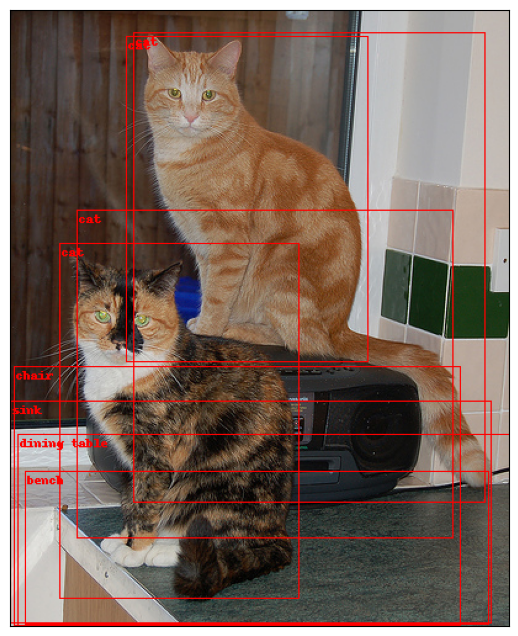

In [ ]:
import torch
import numpy as np

from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.io.image import read_image
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms import ToTensor
import torchvision.transforms.functional as F

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False, figsize=(12, 8))
    for i, img in enumerate(imgs):

        img = img.detach()

        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])



train_dataset = torchvision.datasets.VOCDetection(root='./data', year='2008', image_set='train', download=True, transform=transform)
# Initialize model with the best available weights
model = fasterrcnn_resnet50_fpn(pretrained=True, progress=True)

# Set model to evaluation mode
model.eval()

# Choose an example index
example_idx = 125

# Get the example image and its corresponding labels
image, target = train_dataset[example_idx]
image = image.unsqueeze(0)  # Add batch dimension
prediction = model(image)

# Visualize the prediction
labels = [int(x) for x in prediction[0]['labels']]
category_labels = [labels_dict[str(label)] for label in labels]
# Print the list of category labels
print(labels)
print(category_labels)

boxes = prediction[0]['boxes']
scores = prediction[0]['scores']

print("labels", labels)
print("boxes", boxes, boxes.shape, len(boxes))
print("scores", scores)

# Convert the image tensor to uint8
image_uint8 = (image.squeeze(0) * 255).to(torch.uint8)

# Draw bounding boxes on the image
image_with_boxes = draw_bounding_boxes(image_uint8, boxes=boxes, labels=category_labels, colors="red")

# Show the image with bounding boxes
show(image_with_boxes)

In [ ]:
print(model)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
# Initialize an empty set to collect unique labels
unique_labels = set()

# Iterate through the dataset to collect labels
for idx in range(len(train_dataset)):
    _, target = train_dataset[idx]
    for obj in target['annotation']['object']:
        label = obj['name']
        unique_labels.add(label)

# Print the unique labels
print("Unique Labels:")
for label in sorted(unique_labels):
    print(label)

Unique Labels:
aeroplane
bicycle
bird
boat
bottle
bus
car
cat
chair
cow
diningtable
dog
horse
motorbike
person
pottedplant
sheep
sofa
train
tvmonitor


In [ ]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

num_classes = len(unique_labels)
print("num_classes", num_classes)
new_model = fasterrcnn_resnet50_fpn(pretrained=True, progress=True)

print("new_model",new_model.roi_heads.box_predictor)
# Modify the FastRCNNPredictor model
in_features = new_model.roi_heads.box_predictor.cls_score.in_features
new_model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

print(new_model.roi_heads.box_predictor)

num_classes 20
new_model FastRCNNPredictor(
  (cls_score): Linear(in_features=1024, out_features=91, bias=True)
  (bbox_pred): Linear(in_features=1024, out_features=364, bias=True)
)
FastRCNNPredictor(
  (cls_score): Linear(in_features=1024, out_features=20, bias=True)
  (bbox_pred): Linear(in_features=1024, out_features=80, bias=True)
)


In [1]:
import torchvision
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Define label mapping
label_mapping = {
    'aeroplane': 0,
    'bicycle': 1,
    'bird': 2,
    'boat': 3,
    'bottle': 4,
    'bus': 5,
    'car': 6,
    'cat': 7,
    'chair': 8,
    'cow': 9,
    'diningtable': 10,
    'dog': 11,
    'horse': 12,
    'motorbike': 13,
    'person': 14,
    'pottedplant': 15,
    'sheep': 16,
    'sofa': 17,
    'train': 18,
    'tvmonitor': 19
}

transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images to a fixed size
    transforms.CenterCrop((64, 64)),  # Center crop to ensure fixed size
    transforms.ToTensor()
])

train_dataset = torchvision.datasets.VOCDetection(root='./data', year='2008', image_set='train', download=True, transform=transform)
#train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, collate_fn=lambda x: x)

# Define batch size
batch_size = 2


def custom_train_loader(dataset, batch_size):
    # Iterate over the dataset
    for idx in range(0, len(dataset), batch_size):
        # Initialize lists to store batches of images, boxes, and labels
        batch_images = []
        batch_boxes = []
        batch_labels = []

        for i in range(idx, min(idx + batch_size, len(dataset))):
            # Get the image and target at the current index
            image, target = dataset[i]

            # Add the image to the batch
            batch_images.append(image)

            # Extract boxes and labels from the target
            boxes = []
            labels = []
            for obj in target['annotation']['object']:
                xmin = float(obj['bndbox']['xmin'])
                ymin = float(obj['bndbox']['ymin'])
                xmax = float(obj['bndbox']['xmax'])
                ymax = float(obj['bndbox']['ymax'])
                boxes.append([xmin, ymin, xmax, ymax])
                labels.append(label_mapping[obj['name']])

            # Convert boxes to a tensor
            boxes = torch.tensor(boxes, dtype=torch.float32)

            # Add boxes and labels to the batch lists
            batch_boxes.append(boxes)
            batch_labels.append(torch.tensor(labels))

        # Stack images
        batch_images = torch.stack(batch_images)

        # Yield the batch

        processed_targets = [{'boxes': boxes, 'labels': labels} for boxes, labels in zip(batch_boxes, batch_labels)]

        yield batch_images, processed_targets


train_dataset = list(train_dataset)
train_dataset = train_dataset[:512]
print("train_dataset", train_dataset[0])

# Create a generator object for the train_loader
train_dataloader = custom_train_loader(train_dataset, batch_size)

for i, (batch_images, batch_targets) in enumerate(train_dataloader):
  if i == 0 :
    print("Batch Images Shape:", batch_images.shape)
    print("Batch Targets Length:", len(batch_targets))
    print("Example Target Element:", batch_targets[0])
  break

val_dataset_1 = torchvision.datasets.VOCDetection(root='./data', year='2008', image_set='val', download=True, transform=transform)

val_dataset_1 = list(val_dataset_1)
val_dataset = val_dataset_1[:128]
test_dataset = val_dataset_1[128:138]

val_dataloader = custom_train_loader(val_dataset, batch_size)

for i, (batch_images, batch_targets) in enumerate(val_dataloader):
  if i == 0 :
    print("Batch Images Shape:", batch_images.shape)
    print("Batch Targets Length:", len(batch_targets))
    print("Example Target Element:", batch_targets[0])
  break


# Initialize an empty set to collect unique labels
unique_labels = set()

# Iterate through the dataset to collect labels
for idx in range(len(train_dataset)):
    _, target = train_dataset[idx]
    for obj in target['annotation']['object']:
        label = obj['name']
        unique_labels.add(label)



num_classes = len(unique_labels)
#print("num_classes", num_classes)
new_model = fasterrcnn_resnet50_fpn(pretrained=True, progress=True)

#print("new_model",new_model.roi_heads.box_predictor)
# Modify the FastRCNNPredictor model
in_features = new_model.roi_heads.box_predictor.cls_score.in_features
new_model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

for param in new_model.backbone.parameters():
    param.requires_grad = False

#print(new_model.roi_heads.box_predictor)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device", device)

new_model.to(device)

# Define optimizer
params_to_optimize = [
    {"params": new_model.roi_heads.box_predictor.parameters(), "lr": 0.001},  # Parameters of the model's head
]

# If you want to optimize the backbone as well, uncomment the following line:
# params_to_optimize += [
#     {"params": new_model.backbone.parameters(), "lr": 0.0001},  # Parameters of the backbone
# ]

# Define optimizer
optimizer = torch.optim.SGD(params_to_optimize, lr=0.001, momentum=0.9, weight_decay=0.0005)

optimizer = torch.optim.SGD(new_model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0005)


# Define variables for tracking best model
best_val_loss = float('inf')
best_model_path = 'best_model.pth'

Using downloaded and verified file: ./data/VOCtrainval_11-May-2012.tar
Extracting ./data/VOCtrainval_11-May-2012.tar to ./data
train_dataset (tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0863, 0.0745, 0.0667],
         [0.0000, 0.0000, 0.0000,  ..., 0.0706, 0.0667, 0.0627],
         [0.0000, 0.0000, 0.0000,  ..., 0.0588, 0.0588, 0.0510],
         ...,
         [0.3490, 0.2667, 0.1765,  ..., 0.5451, 0.3843, 0.3490],
         [0.3961, 0.3294, 0.2392,  ..., 0.5725, 0.4471, 0.3373],
         [0.4980, 0.5176, 0.4745,  ..., 0.5529, 0.5412, 0.3608]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0941, 0.0824, 0.0745],
         [0.0000, 0.0000, 0.0000,  ..., 0.0784, 0.0745, 0.0706],
         [0.0000, 0.0000, 0.0000,  ..., 0.0667, 0.0667, 0.0588],
         ...,
         [0.3137, 0.2510, 0.1686,  ..., 0.5373, 0.3725, 0.3412],
         [0.3529, 0.2980, 0.2078,  ..., 0.6000, 0.4471, 0.3255],
         [0.4431, 0.4706, 0.4314,  ..., 0.6000, 0.5451, 0.3569]],

        [[0.0000, 0.0039, 0.0078,  ..., 0.0784

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


device cpu


**Loss Classifier (NLL Loss)**: This loss measures the classification error of the predicted class labels compared to the ground truth labels. It is typically calculated using a negative log likelihood (NLL) loss function.

**Loss Box Regression**: This loss measures the discrepancy between the predicted bounding box coordinates and the ground truth bounding box coordinates. It's usually a regression loss, such as Smooth L1 loss or Mean Squared Error (MSE).

**Loss Objectness (Binary Cross-Entropy Loss)**: This loss is associated with the binary classification task of determining whether an object is present or not in a region proposed by the Region Proposal Network (RPN). It's often computed using a binary cross-entropy loss function.

**Loss RPN Box Regression**: This loss is similar to Loss Box Regression but specifically calculated for the Region Proposal Network (RPN) bounding box coordinates.

In [ ]:
num_epochs = 2
# Gradient Accumulation: Instead of updating the model's parameters after processing each batch, you can accumulate gradients
# over multiple batches and update the parameters less frequently.
# This can effectively reduce the memory footprint during training.

accumulation_steps = 4  # For example, accumulate gradients over 4 batches

for epoch in range(num_epochs):
    new_model.train()
    total_loss = 0.0

    # Iterate over batches
    for i, (batch_images, batch_targets) in enumerate(train_dataloader):
        # Move images to GPU
        batch_images = batch_images.to(device)

        # Preprocess targets
        processed_targets = []
        for targets in batch_targets:
            # Convert target dictionary to device
            targets = {k: v.to(device) for k, v in targets.items()}
            processed_targets.append(targets)

        # Forward pass
        loss_dict = new_model(batch_images, processed_targets)
        print("loss_dict", loss_dict)
        # Assuming loss_dict is already defined as described
        loss_classifier = loss_dict['loss_classifier']
        loss_box_reg = loss_dict['loss_box_reg']
        loss_objectness = loss_dict['loss_objectness']
        loss_rpn_box_reg = loss_dict['loss_rpn_box_reg']

        # Summing the losses
        total_loss += loss_classifier + loss_box_reg + loss_objectness #+ loss_rpn_box_reg

        if (i + 1) % accumulation_steps == 0:
            # Compute gradients
            loss = total_loss / accumulation_steps
            loss.backward()

            # Perform optimization step after accumulating gradients
            optimizer.step()
            optimizer.zero_grad()  # Reset gradients

            # Reset total_loss for the next accumulation step
            total_loss = 0.0


    # Evaluation on validation set
    new_model.eval()
    total_val_loss = 0.0

    with torch.no_grad():
        # Preprocess targets
        processed_targets = []
        for batch_images, batch_targets in val_dataloader:
           batch_images = batch_images.to(device)
           for targets in batch_targets:
                # Convert target dictionary to device
                targets = {k: v.to(device) for k, v in targets.items()}
                processed_targets.append(targets)

           # Forward pass

           loss_dict = new_model(batch_images, processed_targets)
           print("loss_dict", loss_dict)

           # Assuming loss_dict is already defined as described
           loss_classifier = loss_dict['loss_classifier']
           loss_box_reg = loss_dict['loss_box_reg']
           loss_objectness = loss_dict['loss_objectness']
           loss_rpn_box_reg = loss_dict['loss_rpn_box_reg']

           # Summing the losses
           total_val_loss += loss_classifier + loss_box_reg + loss_objectness #+ loss_rpn_box_reg

    # Calculate average validation loss
    avg_val_loss = total_val_loss / len(val_dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {avg_val_loss:.4f}')

    # Save the best model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(new_model.state_dict(), best_model_path)

print("Training completed. Best model saved.")

loss_dict {'loss_classifier': tensor(2.6603, grad_fn=<NllLossBackward0>), 'loss_box_reg': tensor(0.0001, grad_fn=<DivBackward0>), 'loss_objectness': tensor(18.9863, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), 'loss_rpn_box_reg': tensor(99.3391, grad_fn=<DivBackward0>)}
loss_dict {'loss_classifier': tensor(2.7013, grad_fn=<NllLossBackward0>), 'loss_box_reg': tensor(1.9210e-05, grad_fn=<DivBackward0>), 'loss_objectness': tensor(17.8718, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), 'loss_rpn_box_reg': tensor(136.5620, grad_fn=<DivBackward0>)}
loss_dict {'loss_classifier': tensor(2.6645, grad_fn=<NllLossBackward0>), 'loss_box_reg': tensor(6.6659e-05, grad_fn=<DivBackward0>), 'loss_objectness': tensor(17.2223, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), 'loss_rpn_box_reg': tensor(119.3814, grad_fn=<DivBackward0>)}
loss_dict {'loss_classifier': tensor(2.6454, grad_fn=<NllLossBackward0>), 'loss_box_reg': tensor(0.0003, grad_fn=<DivBackward0>), 'loss_objectness': tensor(6.5072